Importing all dependencies

In [1]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import re
import warnings
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

Loading Data

In [2]:
# Specify the full path to the CSV file
file_path = r'C:\Users\Edna\Documents\GitHub\Haile_Resort_Sentiment_Analysis\data\raw\Merged Ziway.csv'

# Load the reviews data from the specified path
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df.head()

,Rating,Review_title,Review_comment
0,5.0,Exceptional,"The lake, the bird island and Gelila island, t..."
1,4.0,Lakeside comfort in Ziway,A very well kept resort with friendly and help...
2,4.0,Very good,"There is no air conditioning, only a fan. But ..."
3,4.0,Very good,The staff kindness and the local.\nThere was n...
4,4.0,Cofortable stay at perfect location,good Location


Data Cleaning and Preprocessing

In [3]:
#Checking for missing value
df.isna().sum()

Rating             0
Review_title       0
Review_comment    17
dtype: int64

Handling Missing Value

In [4]:
# Inspect rows with missing Review_comment
print(df[df['Review_comment'].isna()])

# Fill missing Review_comment values with Review_title
df['Review_comment'].fillna(df['Review_title'], inplace=True)


# Verify there are no missing Review_comment values
assert df['Review_comment'].isna().sum() == 0

# Check the DataFrame
df.head()

    Rating Review_title Review_comment
9      0.5          Bad            NaN
12     4.0    Very good            NaN
13     4.5       Superb            NaN
14     4.0    Very good            NaN
15     4.5       Superb            NaN
16     4.0    Very good            NaN
17     4.0    Very good            NaN
18     5.0  Exceptional            NaN
19     5.0  Exceptional            NaN
20     5.0  Exceptional            NaN
21     3.5         Good            NaN
22     3.5         Good            NaN
23     4.0    Very good            NaN
24     4.0    Very good            NaN
25     3.5         Good            NaN
26     3.0     Pleasant            NaN
35     5.0  Exceptional            NaN


,Rating,Review_title,Review_comment
0,5.0,Exceptional,"The lake, the bird island and Gelila island, t..."
1,4.0,Lakeside comfort in Ziway,A very well kept resort with friendly and help...
2,4.0,Very good,"There is no air conditioning, only a fan. But ..."
3,4.0,Very good,The staff kindness and the local.\nThere was n...
4,4.0,Cofortable stay at perfect location,good Location


In [5]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Customize stopwords
stop_words = stopwords.words('english')
new_stopwords = ["would", "shall", "could", "might"]
stop_words.extend(new_stopwords)
stop_words.remove("not")
stop_words = set(stop_words)
print(stop_words)

{'wasn', 'yourselves', 's', 'over', "wasn't", 'as', 'won', 'that', 'where', 'both', 'do', "shan't", 'about', 'o', 'what', 'when', "won't", 'so', "aren't", 'theirs', "shouldn't", 'here', 'could', 'didn', 'yours', 'its', "that'll", 'all', "haven't", 'he', 'own', 'isn', 'very', 'with', "you've", 'his', 'can', 've', 'hadn', "hadn't", 'will', 'and', 'our', "mustn't", 'wouldn', 'shouldn', 'whom', 'under', "couldn't", 'your', 'for', 'has', 'from', 'ma', 'in', 'who', "hasn't", 'it', 'don', 'couldn', 'are', 'were', 'might', 'my', 'above', 'there', 'these', 'mightn', 'itself', "you'll", 'some', 'll', 'am', 'does', 'against', 'few', "didn't", 'because', 'doing', 'their', 'ourselves', 'hers', 'between', 'then', 'now', 'being', "you're", 'myself', 'of', 'y', 'himself', 'after', 'if', 'why', 'be', 'off', 'by', 'how', 'they', 'you', 'this', 'those', 'but', 'most', 're', 'ain', 'too', 'other', 'i', 'needn', 'which', 'been', 'she', 'aren', 'into', 'same', 'only', 'm', 'while', 'herself', 'to', 'up', "w

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


Data cleaning and preprocessing pipeline

In [6]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Removing special characters
def remove_special_character(content):
    return re.sub('\W+', ' ', content)

# Removing URLs
def remove_url(content):
    return re.sub(r'http\S+|www\S+|https\S+', '', content)

# Removing stopwords from text
def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

# Expansion of English contractions
def contraction_expansion(content):
    content = re.sub(r"won\'t", "will not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)
    content = re.sub(r"\'re", " are", content)
    content = re.sub(r"\'s", " is", content)
    content = re.sub(r"\'d", " would", content)
    content = re.sub(r"\'ll", " will", content)
    content = re.sub(r"\'t", " not", content)
    content = re.sub(r"\'ve", " have", content)
    content = re.sub(r"\'m", " am", content)
    return content

# Comprehensive data cleaning function
def data_cleaning(content):
    # Convert non-string entries to strings
    if not isinstance(content, str):
        content = str(content)
    
    content = contraction_expansion(content)
    content = remove_special_character(content)
    content = remove_url(content)
    content = remove_stopwords(content)
    content = content.lower()
    tokens = content.split()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    cleaned_content = ' '.join(tokens)
    return cleaned_content
df.columns

Index(['Rating', 'Review_title', 'Review_comment'], dtype='object')

In [7]:
# Set display options
pd.options.display.max_colwidth = 1000

# Apply data cleaning to the 'Review_comment' column and save it back to the same column
df['Review_comment'] = df['Review_comment'].apply(data_cleaning)

# Display the results
print(df[['Review_comment']].head(5))


                                                                                                         Review_comment
0                                                                     lake bird island gelila island staff haile resort
1  well kept resort friendly helpful staff arrange trip nearby lake reasonable rate location little way town handy lake
2                                                                             air conditioning fan website not accurate
3                                        staff kindness local refrigerator hot air conditioning net bed not comfortable
4                                                                                                         good location


Double-check for any other missing values

In [8]:
# Check for missing values in the entire DataFrame
print(df.isnull().sum())

#Fill missing 'Rating' with the mean rating
df['Rating'].fillna(df['Rating'].mean(), inplace=True)


Rating            0
Review_title      0
Review_comment    0
dtype: int64


In [9]:
df['Rating'].value_counts()

Rating
4.0    16
5.0    11
3.0     5
3.5     3
4.5     2
2.0     2
0.5     1
Name: count, dtype: int64

In [10]:
#Convert 'Rating' to integer if it's not already
df['Rating'] = df['Rating'].astype(int)

In [11]:
df['Rating'].value_counts()

Rating
4    18
5    11
3     8
2     2
0     1
Name: count, dtype: int64

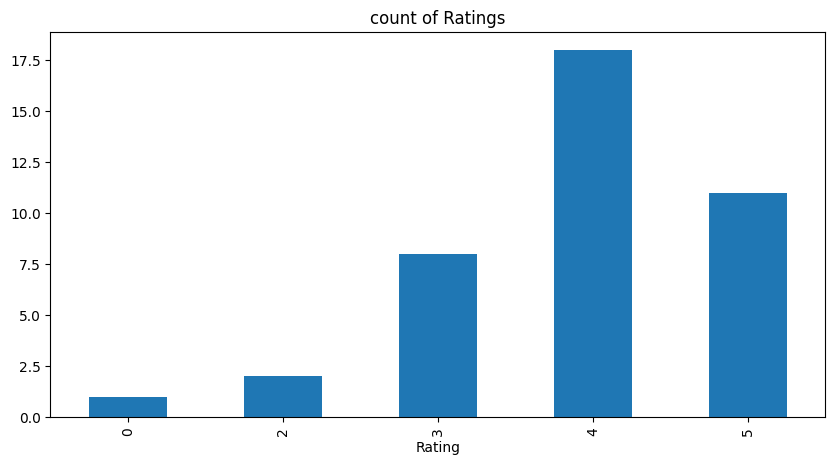

In [12]:
#plot count of Ratings
ax = df['Rating'].value_counts().sort_index().plot(kind = 'bar',title = 'count of Ratings',figsize = (10,5))
ax.set_xlabel('Rating')
plt.show()

In [13]:
print('Unique reviews:%s' % df.Review_comment.nunique())
print('No of ratings:%s'% df['Rating'].count())

Unique reviews:28
No of ratings:40


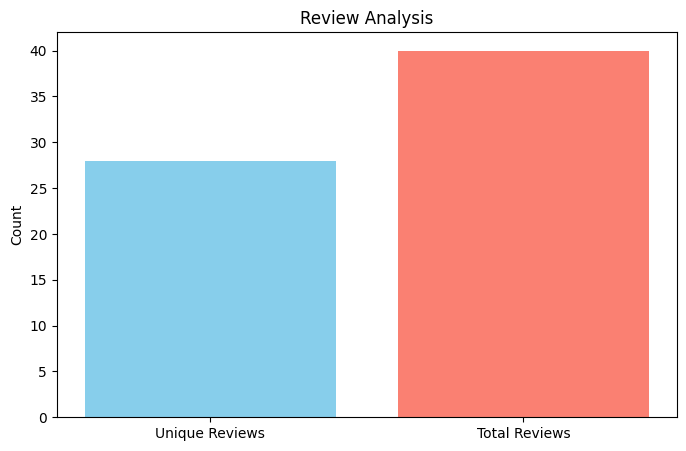

In [14]:
import matplotlib.pyplot as plt

unique_reviews = df['Review_comment'].nunique()
total_reviews = df['Review_comment'].count()

# Data for plotting
labels = ['Unique Reviews', 'Total Reviews']
values = [unique_reviews, total_reviews]

# Plotting the bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['skyblue', 'salmon'])
plt.title('Review Analysis')
plt.ylabel('Count')
plt.show()

Sentiment analysis with Vader pretrained model 

In [15]:
# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis and get the compound score
df['Sentiment_score'] = df['Review_comment'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Function to categorize sentiment using both score and rating with adjusted thresholds
def categorize_with_rating(score, rating):
    if rating >= 4:
        return 'Positive'
    elif rating <= 2:
        return 'Negative'
    else:
        if score > 0.7:  
            return 'Positive'
        elif score < -0.2:  
            return 'Negative'
        else:
            return 'Neutral'

# Apply the hybrid approach
df['Sentiment'] = df.apply(lambda row: categorize_with_rating(row['Sentiment_score'], row['Rating']), axis=1)

# Verify the new class distribution
print(df['Sentiment'].value_counts())

Sentiment
Positive    30
Negative     6
Neutral      4
Name: count, dtype: int64


[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


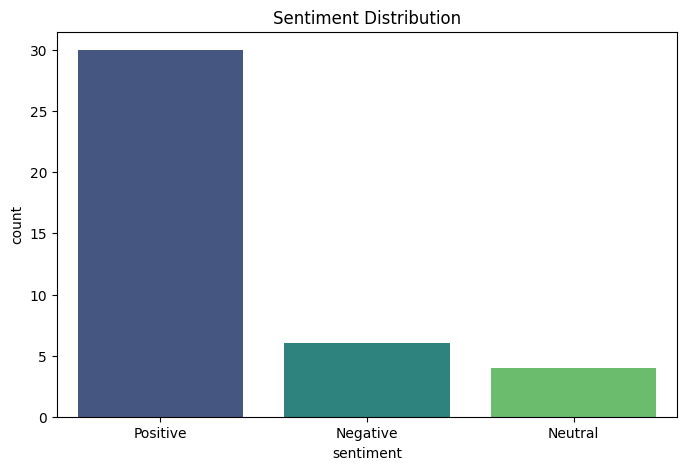

In [16]:
#Viisualize sentiment
import matplotlib.pyplot as plt
import seaborn as sns
sentiment_counts = df['Sentiment'].value_counts()
#plot
plt.figure(figsize=(8,5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette ='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('sentiment')
plt.ylabel('count')
plt.show()

Visualization with word cloud 

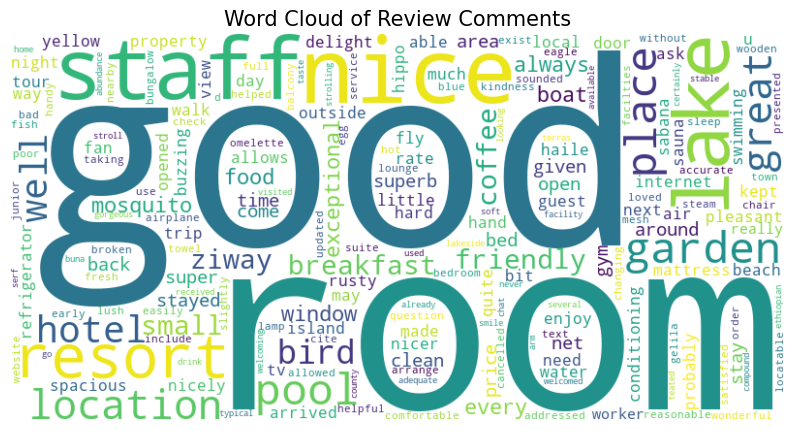

In [17]:
# Create a word cloud plot
def create_wordcloud(data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(data))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=15)
    plt.show()

# Generate and display the word cloud plot for review comments
create_wordcloud(df['Review_comment'], 'Word Cloud of Review Comments')

(np.float64(-0.5), np.float64(1499.5), np.float64(799.5), np.float64(-0.5))

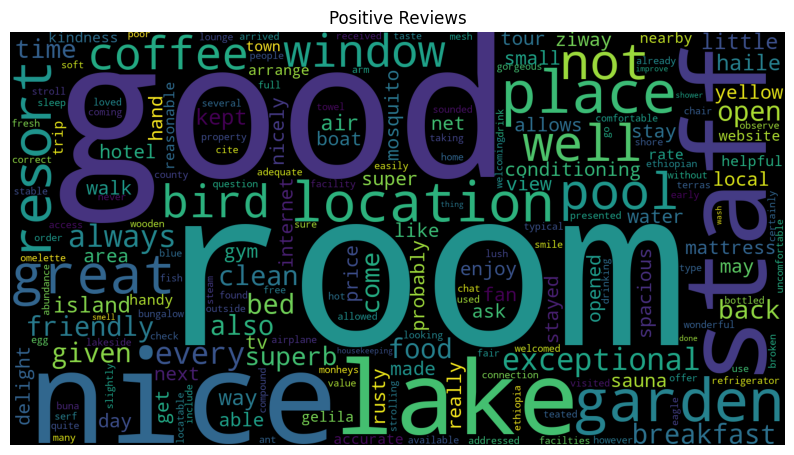

In [18]:
#word cloud for positive Reviews
sentences=df['Review_comment']
pos=' '.join(map(str,sentences[df['Rating']>=4]))
neg=' '.join(map(str,sentences[df['Rating']<=2]))
  
pos_wordcloud = WordCloud(width = 1500, height = 800, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 15).generate(pos) 

plt.figure(figsize=(10,10))
plt.imshow(pos_wordcloud)
plt.title('Positive Reviews')
plt.axis('off')

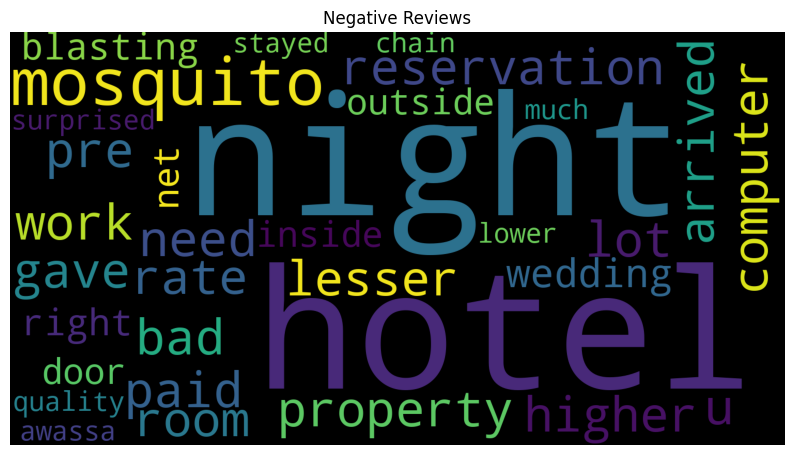

In [19]:
neg_wordcloud = WordCloud(width = 1500, height = 800, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 15).generate(neg) 

plt.figure(figsize=(10,10))
plt.imshow(neg_wordcloud)
plt.title('Negative Reviews')
plt.axis('off')
plt.show() 

Visulaization of number of charactor in reviews

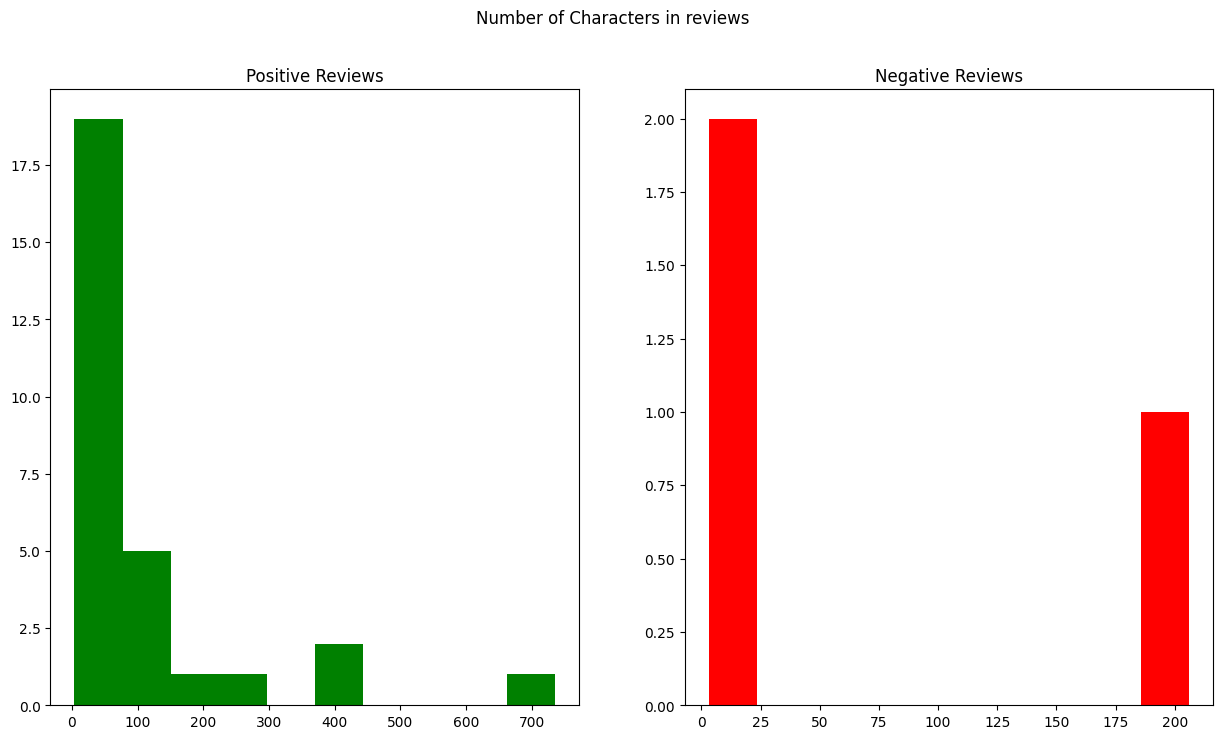

In [20]:
#Visulaization of number of charactor in reviews
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
len_pos_review=df[df['Rating']>=4]['Review_comment'].str.len()
pos_ax.hist(len_pos_review,color='green')
pos_ax.set_title('Positive Reviews')
len_neg_review=df[df['Rating']<=2]['Review_comment'].str.len()
neg_ax.hist(len_neg_review,color='red')
neg_ax.set_title('Negative Reviews')
figure.suptitle('Number of Characters in reviews')
plt.show()

Frequency of words (unigram,bigram,trigrams) for Positive & negative Reviews

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'browser'

# Function to get top n-grams
def get_top_text_ngrams(corpus, n=None, ngram_range=(1, 1)):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Filter for negative reviews (reviews with rating >= 2)
positive_reviews = df[df['Rating'] >= 4]

# Extract unigrams, bigrams, and trigrams
unigrams = dict(get_top_text_ngrams(positive_reviews['Review_comment'], 20, (1, 1)))
bigrams = dict(get_top_text_ngrams(positive_reviews['Review_comment'], 20, (2, 2)))
trigrams = dict(get_top_text_ngrams(positive_reviews['Review_comment'], 20, (3, 3)))

# Convert to DataFrames for visualization
unigrams_df = pd.DataFrame(unigrams.items(), columns=["Common_Unigrams", "Count"])
bigrams_df = pd.DataFrame(bigrams.items(), columns=["Common_Bigrams", "Count"])
trigrams_df = pd.DataFrame(trigrams.items(), columns=["Common_Trigrams", "Count"])

# Plot Unigrams
fig1 = px.bar(unigrams_df, x="Count", y="Common_Unigrams", 
              title='Top 20 Unigrams in Positive Reviews',
              orientation='h', width=700, height=700, color='Common_Unigrams')
fig1.show()

# Plot Bigrams
fig2 = px.bar(bigrams_df, x="Count", y="Common_Bigrams", 
              title='Top 20 Bigrams in Positive Reviews',
              orientation='h', width=700, height=700, color='Common_Bigrams')
fig2.show()

# Plot Trigrams
fig3 = px.bar(trigrams_df, x="Count", y="Common_Trigrams", 
              title='Top 20 Trigrams in Positive Reviews',
              orientation='h', width=700, height=700, color='Common_Trigrams')
fig3.show()

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'browser'

# Function to get top n-grams
def get_top_text_ngrams(corpus, n=None, ngram_range=(1, 1)):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


negative_reviews = df[df['Rating'] <= 2]

# Extract unigrams, bigrams, and trigrams
unigrams = dict(get_top_text_ngrams(negative_reviews['Review_comment'], 20, (1, 1)))
bigrams = dict(get_top_text_ngrams(negative_reviews['Review_comment'], 20, (2, 2)))
trigrams = dict(get_top_text_ngrams(negative_reviews['Review_comment'], 20, (3, 3)))

# Convert to DataFrames for visualization
unigrams_df = pd.DataFrame(unigrams.items(), columns=["Common_Unigrams", "Count"])
bigrams_df = pd.DataFrame(bigrams.items(), columns=["Common_Bigrams", "Count"])
trigrams_df = pd.DataFrame(trigrams.items(), columns=["Common_Trigrams", "Count"])

# Plot Unigrams
fig1 = px.bar(unigrams_df, x="Count", y="Common_Unigrams", 
              title='Top 20 Unigrams in Negative Reviews',
              orientation='h', width=700, height=700, color='Common_Unigrams')
fig1.show()

# Plot Bigrams
fig2 = px.bar(bigrams_df, x="Count", y="Common_Bigrams", 
              title='Top 20 Bigrams in Negative Reviews',
              orientation='h', width=700, height=700, color='Common_Bigrams')
fig2.show()

# Plot Trigrams
fig3 = px.bar(trigrams_df, x="Count", y="Common_Trigrams", 
              title='Top 20 Trigrams in Negative Reviews',
              orientation='h', width=700, height=700, color='Common_Trigrams')
fig3.show()

check for words in negative and positive Reviews

In [23]:
import pandas as pd

# Filter reviews based on rating and specific negative words
filtered_reviews = df[
    (df['Rating'] >= 4) & 
    (df['Review_comment'].str.contains("bad|dirty|unclean|broken", case=False, na=False))
]

# Display the results
#filtered_reviews[["Rating", "Review_comment"]].value_counts().sum()
filtered_reviews[["Rating", "Review_comment"]].head()

,Rating,Review_comment
5,4,wonderful stay ziway arrived allowed check room early without question breakfast great fresh egg omelette made order great coffee resort full bird fish eagle little yellow blue bird loved lush well kept property garden pool clean well presented lounge chair wooden mattress slightly broken area addressed given pool towel great bungalow small fan room sounded like airplane taking not use great mosquito mesh window sleep window open


In [24]:
import pandas as pd

# Filter reviews based on rating and specific negative words
filtered_reviews = df[
    (df['Rating'] <= 2) & 
    (df['Review_comment'].str.contains("good|great|nice|amazing|best", case=False, na=False))
]
# Display the results
#filtered_reviews[["Rating", "Review_comment"]].value_counts().sum()
filtered_reviews[["Rating", "Review_comment"]].head()

,Rating,Review_comment


Save the labeled dataset to a CSV file

In [25]:
df.to_csv(r'C:\Users\Edna\Documents\GitHub\Haile_Resort_Sentiment_Analysis\data\processed\Clean\Merged Ziway_sentiment_labeled_wordcloud.csv', index=False)